<a href="https://colab.research.google.com/github/khushijashnani/CEEL-82B---Data-Science/blob/master/Exp8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Data Science - Experiment 8**

Name - Khushi Jashnani

UID - 2018130017

###**Objective**:
 
Understanding Support Vector Machine algorithm through building SVM algorithm in Python

### **Theory** :
An SVM is a numeric classifier. That means that all of the features of the data must be numeric, not symbolic. Furthermore, in this class, we'll assume that the SVM is a binary classifier: that is, it classifies points as one of two classifications. We'll typically call the classifications "+" and " -".

A trained SVM is defined by two values:

- A normal vector w (also called the weight vector), which solely determines the shape and direction of the decision boundary.

- A scalar offset b, which solely determines the position of the decision boundary with respect to the origin.

A trained SVM can then classify a point x by computing w · x + b. If this value is positive, x is classified as +; otherwise, x is classified as -.

The decision boundary is coerced by support vectors, so called because these vectors (data points) support the boundary: if any of these points are moved or eliminated, the decision boundary changes! All support vectors lie on a gutter, which can be thought of as a line running parallel to the decision boundary. There are two gutters: one gutter hosts positive support vectors, and the other, negative support vectors.

Note that, though a support vector is always on a gutter, it's not necessarily true that every data point on a gutter is a support vector.

Below are the five principle SVM equations, as taught in lecture and recitation. Equations 1-3 define the decision boundary and the margin width, while Equations 4 and 5 can be used to calculate the alpha (supportiveness) values for the training points.

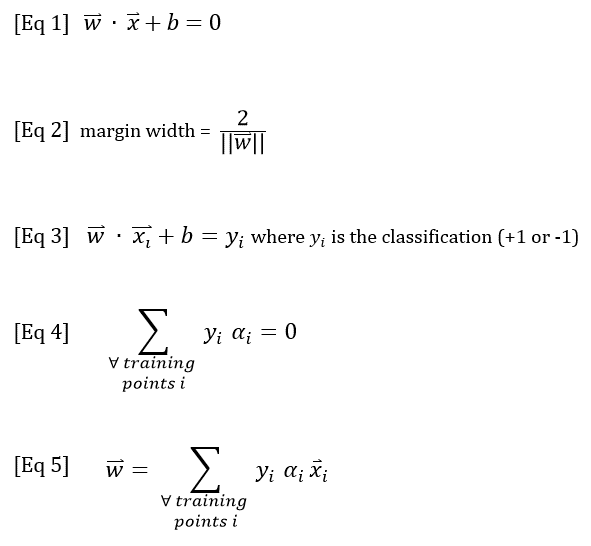




In [ ]:
# Importing important libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
%matplotlib inline

from sklearn.svm import SVC

In [ ]:
# We'll define a function to draw a nice plot of an SVM
def plot_svc(svc, X, y, h=0.02, pad=0.25):
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
    plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)

    # Support vectors indicated in plot by vertical lines
    sv = svc.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c='k', marker='x', s=100, linewidths='1')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    print('Number of support vectors: ', svc.support_.size)
    print('Support vectors: ',svc.support_)

In [ ]:
# Generating random data: 20 observations of 2 features and divide into two classes
np.random.seed(5)
X = np.random.randn(20,2)
y = np.repeat([1,-1], 10)
X[y == -1] = X[y == -1] +1

Text(0, 0.5, 'X2')

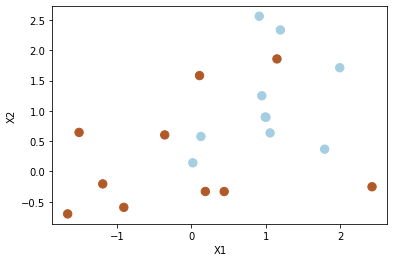

In [ ]:
plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

Here we can see that the 20 data points are randomly placed.

In [ ]:
svc = SVC(C=1, kernel='linear')
svc.fit(X, y)

SVC(C=1, kernel='linear')

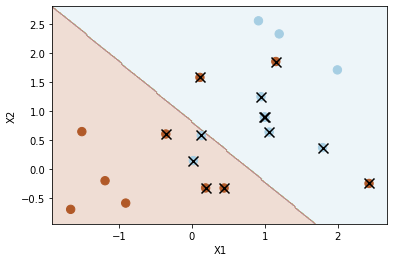

Number of support vectors:  13
Support vectors:  [10 11 13 14 15 16 17  0  1  2  4  6  8]


In [ ]:
plot_svc(svc, X, y)

Here we can see that 13 datapoints are taken in the soft margin area with 5 misclassifcations

In [ ]:
y_pred = svc.predict(X)
print("Accuracy: ", svc.score(X, y))
pd.DataFrame(confusion_matrix(y, y_pred), index=["Actual -1","Actual 1"], columns=["Predicted -1","Predicted 1"])

Accuracy:  0.75


,Predicted -1,Predicted 1
Actual -1,8,2
Actual 1,3,7


Here we can see that the above mentional number of misclassifcations can be confirmed with the above confusion matrix

Now lets try by keeping the parameter C = 0.1

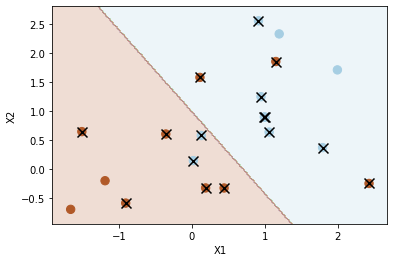

Number of support vectors:  16
Support vectors:  [10 11 13 14 15 16 17 19  0  1  2  3  4  6  8  9]


In [ ]:
svc2 = SVC(C=0.1, kernel='linear')
svc2.fit(X, y)
plot_svc(svc2, X, y)

In [ ]:
y_pred = svc2.predict(X)
print("Accuracy: ", svc2.score(X, y))
pd.DataFrame(confusion_matrix(y, y_pred), index=["Actual -1","Actual 1"], columns=["Predicted -1","Predicted 1"])

Accuracy:  0.75


,Predicted -1,Predicted 1
Actual -1,8,2
Actual 1,3,7


Here we can see that the soft margin has widened with an increase in the number of support vectors but the miscalssifcation rate remains the same.

Now lets perform a grid search the determine the optimal value of C for our data points

In [ ]:
from sklearn.model_selection import GridSearchCV

# Select the optimal C parameter by cross-validation
tuned_parameters = [{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}]
clf = GridSearchCV(SVC(kernel='linear'), tuned_parameters, cv=10, scoring="accuracy")
clf.fit(X, y)

GridSearchCV(cv=10, estimator=SVC(kernel='linear'),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}],
             scoring='accuracy')

In [ ]:
clf.best_params_

{'C': 0.001}

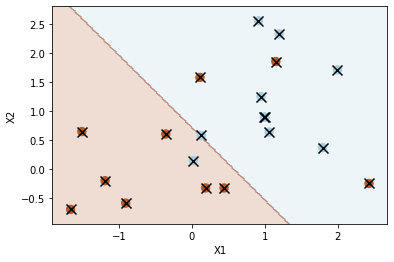

Number of support vectors:  20
Support vectors:  [10 11 12 13 14 15 16 17 18 19  0  1  2  3  4  5  6  7  8  9]


In [ ]:
plot_svc(clf.best_estimator_, X, y)

In [ ]:
y_pred = clf.best_estimator_.predict(X)
print("Accuracy: ", clf.best_estimator_.score(X, y))
pd.DataFrame(confusion_matrix(y, y_pred), index=["Actual -1","Actual 1"], columns=["Predicted -1","Predicted 1"])

Accuracy:  0.8


,Predicted -1,Predicted 1
Actual -1,9,1
Actual 1,3,7


Here we can see that the optimal value for C came to be around 0.001 which gave an accuracy of 80% but the margin has taken up all the data points.

Now lets prepare a test dataset the test our model

In [ ]:
np.random.seed(1)
X_test = np.random.randn(20,2)
y_test = np.random.choice([-1,1], 20)
X_test[y_test == 1] = X_test[y_test == 1] -1

Text(0, 0.5, 'X2')

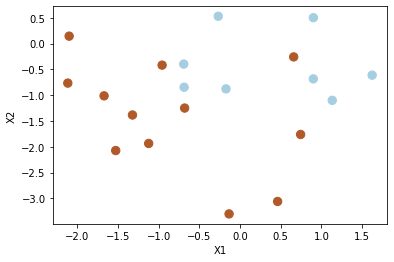

In [ ]:
plt.scatter(X_test[:,0], X_test[:,1], s=70, c=y_test, cmap=mpl.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

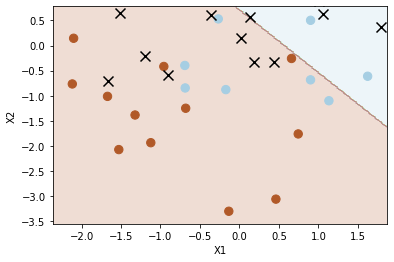

Number of support vectors:  20
Support vectors:  [10 11 12 13 14 15 16 17 18 19  0  1  2  3  4  5  6  7  8  9]


In [ ]:
svc2 = SVC(C=0.001, kernel='linear')
svc2.fit(X, y)
plot_svc(svc2, X_test, y_test)

In [ ]:
y_pred = svc2.predict(X_test)
print("Accuracy: ", svc2.score(X_test, y_test))
pd.DataFrame(confusion_matrix(y_test, y_pred), index=["Actual -1","Actual 1"], columns=["Predicted -1","Predicted 1"])

Accuracy:  0.7


,Predicted -1,Predicted 1
Actual -1,2,6
Actual 1,0,12


With this value of c, 14 of the test observations are correctly classified.

Now lets prepare the dataset which is just linearly separable by giving out test dataset a little nudge

Text(0, 0.5, 'X2')

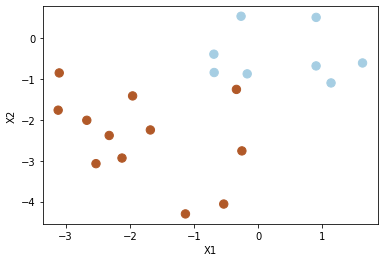

In [ ]:
X_test[y_test == 1] = X_test[y_test == 1] -1
plt.scatter(X_test[:,0], X_test[:,1], s=70, c=y_test, cmap=mpl.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

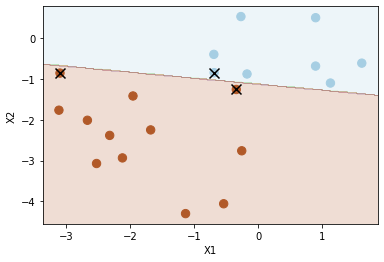

Number of support vectors:  3
Support vectors:  [16 10 19]


In [ ]:
svc3 = SVC(C=1e5, kernel='linear')
svc3.fit(X_test, y_test)
plot_svc(svc3, X_test, y_test)

In [ ]:
y_pred = svc3.predict(X_test)
print("Accuracy: ", svc3.score(X_test, y_test))
pd.DataFrame(confusion_matrix(y_test, y_pred), index=["Actual -1","Actual 1"], columns=["Predicted -1","Predicted 1"])

Accuracy:  1.0


,Predicted -1,Predicted 1
Actual -1,8,0
Actual 1,0,12


Here we can see from the graph that the margin is very narrow (because the observations that are not support vectors, indicated as circles, are very close to the decision boundary). It seems likely that this model will perform poorly on test data.

Now lets try by increasing the margin i.e increasing the value of C

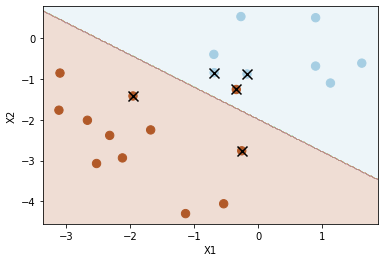

Number of support vectors:  5
Support vectors:  [ 8 16  3  9 19]


In [ ]:
svc4 = SVC(C=1, kernel='linear')
svc4.fit(X_test, y_test)
plot_svc(svc4, X_test, y_test)

In [ ]:
y_pred = svc4.predict(X_test)
print("Accuracy: ", svc4.score(X_test, y_test))
pd.DataFrame(confusion_matrix(y_test, y_pred), index=["Actual -1","Actual 1"], columns=["Predicted -1","Predicted 1"])

Accuracy:  0.95


,Predicted -1,Predicted 1
Actual -1,8,0
Actual 1,1,11


Here we can see that by increasing the margin, although the misclassification rate has increased the variance has reduced and now it may be better performant on the test data.

Now lets generate a dataset with a non-linear class boundary

Text(0, 0.5, 'X2')

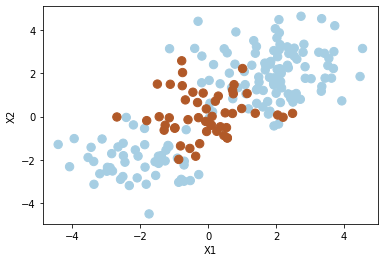

In [ ]:
np.random.seed(8)
X = np.random.randn(200,2)
X[:100] = X[:100] +2
X[101:150] = X[101:150] -2
y = np.concatenate([np.repeat(-1, 150), np.repeat(1,50)])

plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

Here we can see that data points belonging to one class are in the middle of the other class. Hence, the normal linear SVC won't work. For this we need a different kernel called Radial kernel which operates with a radial basis function.

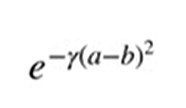

Lets split this data into train set and test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=42)

In [ ]:
print("No. of training data points: ", X_train.shape[0])
print("No. of testing data points: ", X_test.shape[0])

No. of training data points:  100
No. of testing data points:  100


Hence putting the rbf kernel instead of linear here and setting the gamma to 1 (gamma refers to cross validation scale which can increase or decerease the amount of influence of neighbors)

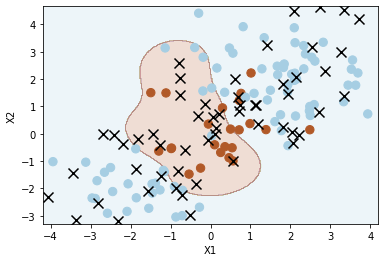

Number of support vectors:  59
Support vectors:  [ 3  4  5  6  9 15 19 21 24 28 31 32 34 36 37 38 39 43 44 45 54 58 64 65
 66 67 70 72 73 80 82 83 85 86 88 89 90 95 99 10 13 18 22 23 26 30 40 50
 60 62 63 74 75 78 79 84 91 93 98]


In [ ]:
svm = SVC(C=1.0, kernel='rbf', gamma=1)
svm.fit(X_train, y_train)
plot_svc(svm, X_test, y_test)

In [ ]:
y_pred = svm.predict(X_test)
print("Accuracy: ", svm.score(X_test, y_test))
pd.DataFrame(confusion_matrix(y_test, y_pred), index=["Actual -1","Actual 1"], columns=["Predicted -1","Predicted 1"])

Accuracy:  0.86


,Predicted -1,Predicted 1
Actual -1,70,7
Actual 1,7,16


Here we can see that we have acheived 86% accuracy with 59 support vectors and 14 misclassifications on the test dataset.

Lets try for a bigger cost value

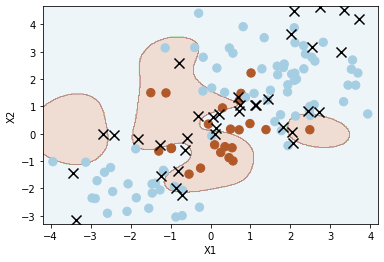

Number of support vectors:  40
Support vectors:  [ 9 15 21 24 28 31 34 36 37 38 44 45 54 64 65 69 70 77 80 82 85 86 88 89
 90 95 97 10 13 18 22 23 33 62 63 75 79 84 91 98]


In [ ]:
# Increasing C parameter, allowing more flexibility
svm2 = SVC(C=100, kernel='rbf', gamma=1.0)
svm2.fit(X_train, y_train)
plot_svc(svm2, X_test, y_test)

In [ ]:
y_pred = svm2.predict(X_test)
print("Accuracy: ", svm2.score(X_test, y_test))
pd.DataFrame(confusion_matrix(y_test, y_pred), index=["Actual -1","Actual 1"], columns=["Predicted -1","Predicted 1"])

Accuracy:  0.8


,Predicted -1,Predicted 1
Actual -1,68,9
Actual 1,11,12


Here we can see that by increasing the cost, the misclassification rate has increased but from the graph we can observe that maybe the model is trying to overfit the data. Lets perform hypertuning

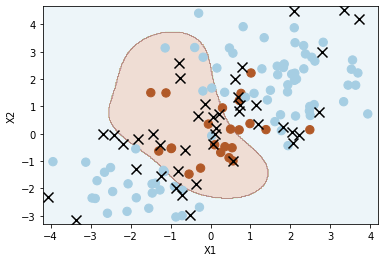

Number of support vectors:  46
Support vectors:  [ 0  3  5  9 15 16 19 21 24 31 32 34 36 37 38 39 45 64 65 70 80 82 83 85
 86 89 90 10 13 18 22 23 26 40 50 51 62 63 74 75 78 79 84 91 93 98]
Best Parameters =  {'C': 1, 'gamma': 0.5}


In [ ]:
tuned_parameters = [{'C': [0.01, 0.1, 1, 10, 100], 'gamma': [0.5, 1,2,3,4]}]
clf = GridSearchCV(SVC(kernel='rbf'), tuned_parameters, cv=10, scoring="accuracy")
clf.fit(X_train, y_train)

plot_svc(clf.best_estimator_, X_test, y_test)
print("Best Parameters = ",clf.best_params_)

In [ ]:
print("Accuracy = ",clf.best_estimator_.score(X_test, y_test))
pd.DataFrame(confusion_matrix(y_test, clf.best_estimator_.predict(X_test)), index=["Actual -1","Actual 1"], columns=["Predicted -1","Predicted 1"])

Accuracy =  0.86


,Predicted -1,Predicted 1
Actual -1,71,6
Actual 1,8,15


Here after fine tuning the SVM we can see that the model has much stable results with cost of 1 and gamma of 0.5. It has sufficient support vectors and has achieved an accuracy of 86%. This gives us a sign of lower variance which tells us that this model will generalise well.


Now lets try using another kernel which is Polynomial kernel

The polynomial kernel is a kernel function commonly used with support vector machines (SVMs) and other kernelized models, that represents the similarity of vectors (training samples) in a feature space over polynomials of the original variables, allowing learning of non-linear models.

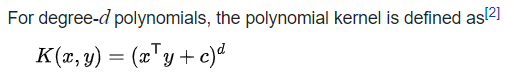

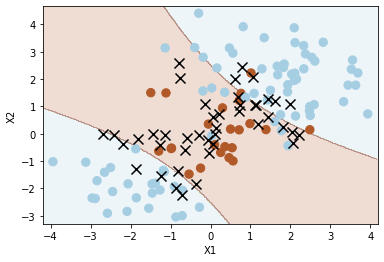

Number of support vectors:  43
Support vectors:  [ 3  9 16 17 19 21 24 32 37 38 39 44 46 55 64 69 80 86 89 90 92 12 13 18
 22 23 26 30 33 41 50 51 56 62 63 74 75 78 79 84 91 93 98]
Best Parameters =  {'C': 1, 'degree': 2}


In [ ]:
tuned_parameters = [{'C': [0.01, 0.1, 1, 10, 100], 'degree':[1,2,3,4,5]}]
clf = GridSearchCV(SVC(kernel='poly',probability=True), tuned_parameters, cv=10, scoring="accuracy")
clf.fit(X_train, y_train)

plot_svc(clf.best_estimator_, X_test, y_test)
print("Best Parameters = ", clf.best_params_)

In [ ]:
print("Accuracy = ",clf.best_estimator_.score(X_test, y_test))
pd.DataFrame(confusion_matrix(y_test, clf.best_estimator_.predict(X_test)), index=["Actual -1","Actual 1"], columns=["Predicted -1","Predicted 1"])

Accuracy =  0.87


,Predicted -1,Predicted 1
Actual -1,66,11
Actual 1,2,21


Here we can see that SVM performs even better with a polynomial kernel with cost as 1 and degree as 2 having 43 support vectors.

It achieved an accuracy of 87%

Since using polynomial kernel gave us the best results, lets its AUC ROC curve.

In [ ]:
!pip install scikit-plot

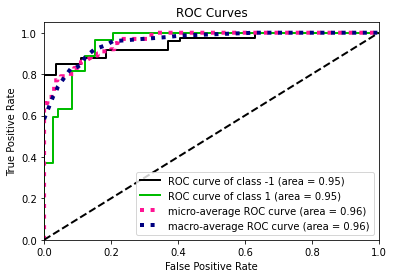

In [ ]:
import scikitplot as skplt

# plotting ROC curve for SVM
logit_scores_proba = clf.best_estimator_.predict_proba(X_train)
skplt.metrics.plot_roc(y_train, logit_scores_proba)
plt.show()

Here we can see that the SVM has acheived a great AUC score with an area of 95% which confirms its accuracy.

Lets see other metrics as well

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=['-1','+1']))

              precision    recall  f1-score   support

          -1       0.86      0.88      0.87        77
          +1       0.57      0.52      0.55        23

    accuracy                           0.80       100
   macro avg       0.72      0.70      0.71       100
weighted avg       0.79      0.80      0.80       100



Here we can see that we have achieved a decent precision, recall and f1 score for this classifier.

**Conclusion -**

Through this experiment, I understood how Support Vector Machines work internally and how SVM uses different kernels to define a SVC after determining the relationship between data points in the high dimensional space. 

I got a deeper understanding of the three kernels namely linear, radial and polynomial.

I also got to understand how different kernels cater to different distribution of data points and which one can perform the best in various scenarios. 

In the end, SVM with polynomial kernel gave the best results and confirmed it by various metrics such as AUC ROC curve, Precision, Recall and F1-score.
